In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

In [3]:
CO2_data = pd.read_csv('../Raw_data/GCB2022v27_MtCO2_flat.csv') #load data

In [37]:
CO2_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,sum_na
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [36]:
CO2_data['sum_na']=CO2_data.isna().sum(True)

In [44]:
CO2_data=CO2_data.dropna(thresh=7) #delete rows with 7 NaN (no observable data)

In [68]:
countries_url = 'https://statisticstimes.com/geography/countries-by-continents.php' #loaded country data with continents
countries = pd.read_html(countries_url)

In [74]:
countries=countries[2]

In [81]:
countries.columns

Index(['No', 'Country or Area', 'ISO-alpha3 Code', 'M49 Code', 'Region 1',
       'Region 2', 'Continent'],
      dtype='object')

In [84]:
countries = countries.drop(columns=['No','M49 Code','Region 2'])
countries=countries.rename(columns={'Country or Area':'Country'})
countries=countries.set_index('Country')

In [114]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,sum_na,ISO-alpha3 Code,Region 1,Continent
199,Afghanistan,AFG,1949,0.014656,0.014656,0.0,0.0,0.0,0.0,NaN,NaN,2,AFG,Southern Asia,Asia
200,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.0,0.0,0.0,NaN,0.011266,1,AFG,Southern Asia,Asia
201,Afghanistan,AFG,1951,0.0916,0.025648,0.065952,0.0,0.0,0.0,NaN,0.012098,1,AFG,Southern Asia,Asia
202,Afghanistan,AFG,1952,0.0916,0.031708,0.059892,0.0,0.0,0.0,NaN,0.011946,1,AFG,Southern Asia,Asia
203,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.0,0.0,0.0,NaN,0.013685,1,AFG,Southern Asia,Asia


In [124]:
df1 = pd.merge(CO2_data, countries, how='left', left_on=['ISO 3166-1 alpha-3'], right_on=['ISO-alpha3 Code']) # merged data frames on iso code

Country               string[python]
ISO 3166-1 alpha-3    string[python]
Year                           Int64
Total                        Float64
Coal                         Float64
Oil                          Float64
Gas                          Float64
Cement                       Float64
Flaring                      Float64
Other                        Float64
Per Capita                   Float64
sum_na                         Int64
ISO-alpha3 Code       string[python]
Region 1              string[python]
Continent             string[python]
dtype: object

In [169]:
# fixed a few missing observations
df1.loc[df1['Country']=='Panama Canal Zone',['Region 1','Continent']]=['Central America','North America']
df1.loc[df1['Country']=='Taiwan',['Region 1','Continent']]=['Eastern Asia','Asia']
df1.loc[df1['Country']=='Kosovo',['Region 1','Continent']]=['Southern Europe','Europe']
df1.loc[df1['Country']=='Global',['Region 1','Continent']]=['World','World']


In [179]:
missing = df1[df1['ISO 3166-1 alpha-3'].isna()]
missing.Country.unique

<bound method Series.unique of 6904     French Equatorial Africa
6905     French Equatorial Africa
6906     French Equatorial Africa
6907     French Equatorial Africa
6908     French Equatorial Africa
                   ...           
16259              Ryukyu Islands
16260              Ryukyu Islands
16261              Ryukyu Islands
16262              Ryukyu Islands
16263              Ryukyu Islands
Name: Country, Length: 84, dtype: object>

In [180]:
df1 = df1.convert_dtypes()
df1.dtypes

Country               string[python]
ISO 3166-1 alpha-3    string[python]
Year                           Int64
Total                        Float64
Coal                         Float64
Oil                          Float64
Gas                          Float64
Cement                       Float64
Flaring                      Float64
Other                        Float64
Per Capita                   Float64
sum_na                         Int64
ISO-alpha3 Code       string[python]
Region 1              string[python]
Continent             string[python]
dtype: object

In [185]:
df1['Year']=pd.to_datetime(df1['Year'],format='%Y')

In [188]:
df1=df1.drop(missing.index,axis=0)

In [194]:
niltotal=df1[df1['Total']==0]
df1=df1.drop(niltotal.index,axis=0)
df1=df1.drop(columns=['sum_na'])

<Axes: xlabel='Year', ylabel='Total'>

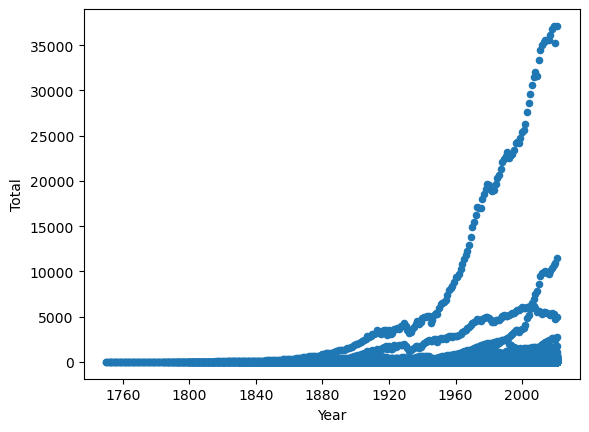

In [193]:
df1.plot(x='Year',y='Total',kind='scatter')

In [199]:
datapath = '../Data'
os.makedirs(datapath, exist_ok=True)
df1.to_csv('../Data.csv')